In [3]:
import os
os.getcwd()

'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final'

## lbbVIX_Main

This is the main "roadmap" for the VX futures project, which creates daily VX term structure from freely available data, and compares the term structure with the S&P 500, the VIX itself, and the Yield Curve. <br><br>

The data are downloaded and cleaned using a variety of techniques ranging from beautiful soup, individual download in notebook for finer granularity  control, yfinance, and excel.<br><br>

The download notebooks are segmented by where you get the data and how you get the data, and are then further segmented by Initial Download (pulling as much historical data as possible) and Update Downloads. Update notebooks for each of the data downloads require that you change exactly which files to download, but I have given you a good start with examples you can uncomment to get working.<br> <br>

I use directories to keep the work somewhat organized, and because of that, the path is established at the beginning of each notebook and may change throughout the notebook, but always pointing back to the main directory (//Final).<br><br>

<div class="alert alert-block alert-info">CHANGE THE PATH ON EACH FILE TO REPRESENT YOUR PARTICULAR ENVIRONMENT, I'VE GIVEN YOU AN EXAMPLE OF WHAT THE PATH SHOULD LOOK LIKE. No wondering about backslashes versus forward slashes, no guessing about relative paths. I prefer relative paths, but that is easy to figure out from the full path I have included.</div><br>
            
            
Which brings me to my next topic, these notebooks have been uploaded as of August 25, 2020. (Don't you hate not knowing when something was published online?<br><br> 

The VX Term study was produced as "machine learning" guide for local study. As such, it does not require cloud accounts, nor heavy metal machine time, nor paid quant data. It illustrates a technical, training harness that could be utilized for more machine intensive practice (like not daily, but real time). The modest, local machine set up this was produced on is as follows:<br><br>

<b>Hardware Setup & OS:</b><br>
Windows 10 pro<br>
Intel Core i7<br>
12G RAM<br>
***
            
<b>Software Setup:</b><br>
conda 4.8.4<br>
python 3.8.3<br>
jupyter notebook 6.0.3 (with conda)<br>
core 4.6.3<br>
ipython 7.16.1<br>
ipykernel 5.3.2<br>
***

Some of the notebooks take several minutes to complete (animations, and a correlation matrix graphic) but should not take over 15 minutes to complete. 

These notebooks also do not require different setting from the typical jupyter notebook setup, however, the author has a highly resolved screen -- code was used that promoted this, especially the dataframes had many features. I have tried to comment all of these out, but just keep that in mind if the fonts blow up on your machine, or the graphics are too big. Just make the adjustments appropriate to your viewing parameters. 

For the animations, your setup will need the FFmpeg downloaded and installed. For whatever reason the link on the main site to download FFmpeg for windows 10 does not have the appropriate file. Follow the wikihow for windows 10 using this link. https://www.wikihow.com/Install-FFmpeg-on-Windows , for other operating systems, the main site download should work fine https://www.ffmpeg.org/

Also of note, on my windows 10 machine I cannot view the mpg files unless I use VLC, which can be downloaded here: https://www.videolan.org/vlc/  I can only imagine the difficulties for animation, which at one time were of no consequence, stem from the fact these elements are still FREE.

Speaking of FREE and what isn't, I apologize for including an excel spreadsheet that is not necessary - <i>but is very important</i> in the understanding of how the VX futures contracts change to form the term structure. If you are already familiar with futures and term structures of futures contracts, you won't need this. If you don't understand how the expiration of the SPX **options** determine the expiration of the VX futures and what the equation is for creating this -- then the excel spreadsheet will probably help you. It also helps to confirm that what the front month is given a particular date so that you can double check your machine code responses.
     
This main notebook lives in the top level of the folder(directory) called 'Final'. All other project notebooks are in the folder /_projectNotebooks directory. Make sure that you have created the directory structure and set up the correct path commands in this notebook, and in all the notebooks in the directory /_projectNotebooks, before you run any of the notebooks below (which have all been commented out) -- when you are ready to run them, remove the # symbol.<br>

### Steps to recreating a VX term structure to compare against SPX, and the yield curve.

[Downloading the initial VX futures data](#001)<br>
[Downloading 2018 data again](#002)<br>
[Removing extra header from some of the raw downloaded files VX](#003)<br>
[Removing extra column from other raw downloaded files for VX](#004)<br>
Move the final files to ./Data-LATEST-VX<br>
[Combine the Data files for VX into one big file](#005)<br>
[Cursory review of the combined Data](#006)<br>
[For each tradeDate, compute the SPX Options Expiration](#007)<br>
[Create the term structure from the VX futures front month](#008)<br>
[Design Quality Checks and clean data](#009)<br>
[Finalize vxTermColumn and futMth columns](#010)<br>
[Reduce df to essential columns before pivot](#011)<br>
[Flatten Term Structure and deal with Nans](#012)<br>
[Animation of VX term structure](#013)<br>
[Grab data from Yahoo (SPX, VIX, FXI](#014)<br>
[Grab data from Fed page on Yield Curve](#015)<br>
[New Features and combination of Yahoo Data with Term Data](#016)<br>
[Animated Yield Curve](#017)<br>
[New YieldCurve features](#018)<br>
[Creating clusters for Yield Curve behavior](#019)<br>
[Combining Yield Curve df with main Term df and running Regressor and Decision Tree algos](#020)<br>


In [15]:

os.chdir('C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks')
#os.getcwd()

<a id="001"></a>
### lbbVIXAnalysis-1-1-1-0-Data-Initial-VX-futures.ipynb - 
This notebook downloads VX historical data - I wish it was that simple.<br><br>
There are two different CBOE download places, <br>
> One has data from the FAR PAST, 2004 - 2018 contract years https://www.cboe.com/products/futures/market-data/historical-data-archive<br><br>
> The other CBOE site has data from the NOT SO RECENT PAST https://markets.cboe.com/us/futures/market_statistics/historical_data/ 2013 - 2021 contracts<br><br>

Good luck finding the first site from the CBOE main site. Us old people remember when the data were at CFE... 
Naturally there is a warning that the data might not be up to snuff, and that if you wanted pristine data, they have it for sale:
<div class="alert alert-block alert-success">PLEASE NOTE: Some historical data will be temporarily unavailable after February 26th, 2018.

The following comma delimited (.CSV) files contain Cboe Futures Exchange (CFE) market data.

CFE data is compiled for the convenience of site visitors and is furnished without responsibility for accuracy and is accepted by the site visitor on the condition that transmission or omissions shall not be made the basis for any claim, demand or cause for action. The information and data was obtained from sources believed to be reliable, but accuracy is not guaranteed. Your use of CFE data is subject to the Terms and Conditions of Cboe's Websites.

    Visit Cboe DataShop for the most comprehensive collection of market data, including proprietary open-close,  VIX Futures, VIX book depth, cryptocurrency, and more.</div>
    

There is no reason we cannot see what the prices are (were) without having to place thousands of dollars with a broker, and then $$ every month for a bloomberg terminal (or other such thing) or pay CBOE for correct data. If you are already trading, you already pay out the .. for these if you have access to futures data, but if you are just trying out a theory -- you should be able to analyze these without paying for the data.

**Some may laugh and think it is more economical to pay the small amount for an eSignal subscription to UX1, UX2..., than struggle with setting up a rolling, constant term structure (and halfway through this project I would have agreed with you). However, if you put in the hard work, you will find a feature that you could not get with the UX series. It is probably the most important feature of this effort. We all use moving averages, or different slices of time to measure against the current time wave. I have found the same is true of the term structure (especially the future futures to the current future term structure). I have not made this finding too obvious - again, this is just a training harness for further research, but it should peak the interest of those who use such elements on a day to day basis. 



In [12]:
%run lbbVIXAnalysis-1-1-1-0-Data-Initial-VX-futures.ipynb

In [18]:
os.chdir('C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks')

<a id="002"></a>
### lbbVIXAnalysis-1-1-1-1-Data-Initial-VX-futures-2018.ipynb - 
This notebook downloads the 2018 contacts from the Not Too Distant Past instead of the Far Past.<br> We are hoping to get complete files since we noticed the 2018 files downloaded from the CBOE Far Past, seemed to be a little light compared to the other downloaded files. <br><br>
> Make sure you have a folder called VX2018 WITHIN the Data-RAW-VX folder before running the notebook<br><br>
> After you are sure these files should replace the previously downloaded ones, move them to the main Data-RAW-VX so that they will write over the old files and replace them.


Don't worry about the extra Header and the added Index we saw earlier, we will tackle those problems next. Refer to the specific notebook for more information.

In [16]:
%run lbbVIXAnalysis-1-1-1-1-Data-Initial-VX-futures-2018.ipynb

In [ ]:
os.chdir('C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks')

<a id="003"></a>
### lbbVIXAnalysis-1-1-1-2-Data-Initial-VX-futures-Rmv-XtraHeader.ipynb - 
You are so lucky, although you may not realize it. I had no idea the data was so wonky until I was halfway through my analysis. To be sure I though I was crazy, which I am, but this time it was the data causing the crazy. <br><br>

We know there are some files with an extra header. I tried to glob my way through the extra header situation just for these files, but couldn't figure it out. So we need to get rid of that extra header only in these particular files, before we attempt to combine all the files into one. <br><br>

Now you may be thinking, wait do I have to open each file and remove the header and then close it? NO, that's what I did the first time around and I couldn't stand it because whenever I blew everything up and had to start over I had to pick through these files! BUT there is some manual labor. 

> 1) Make sure you have a folder called /problemsTwoHeaderLines WITHIN the Data-RAW-VX folder before running the notebook (there should already be files in there)<br>
> 2) Within the /problemsTwoHeaderLines there should be *another folder* called 'headerRemoved' - make sure nothing is in there

In your computer (or wherever you have downloaded these files) Open the folder to where we have our raw data dumped /Data-RAW-VX. Most of these "anomalies" run in sequence. So open the file CFE_F13_VX.csv.. this is what we wished every one of these files looked like. Now open the csv called CFE_F14_VX.csv,this has that extra header. And the next several files have the header too F15, F16, F17, but not F18 that has the correct header (yeah), but an extra column (boo). <br><br>
What you will be doing is COPING the 14, 15, 16, and 17 files of every VX term into the directory /Data-RAW-VX/problemsTwoHeaderLines. <br><br>

> Copy all files with double header into the folder /Data-RAW-VX/problemsTwoHeaderLines  -- Except, I have done that already for you!!

<div class="alert alert-block alert-success">Now if you thought that was easy, you would have been wrong -- because although they do run in sequence, apparently the infection spread to year 13 only in contracts N, Q, U, V, X, and Z.. </div>

When you are finished, **MOVE the new, twoHeader-LESS files into the main directory called Data-RAW-VX** This will write over those files with the two headers. 

In [22]:
os.getcwd()

'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks'

In [23]:
%run lbbVIXAnalysis-1-1-1-2-Data-Initial-VX-futures-Rmv-XtraHeader.ipynb

Removing header from CFE_F14_VX.csv...
Removing header from CFE_F15_VX.csv...
Removing header from CFE_F16_VX.csv...
Removing header from CFE_F17_VX.csv...
Removing header from CFE_G14_VX.csv...
Removing header from CFE_G15_VX.csv...
Removing header from CFE_G16_VX.csv...
Removing header from CFE_G17_VX.csv...
Removing header from CFE_H14_VX.csv...
Removing header from CFE_H15_VX.csv...
Removing header from CFE_H16_VX.csv...
Removing header from CFE_H17_VX.csv...
Removing header from CFE_J14_VX.csv...
Removing header from CFE_J15_VX.csv...
Removing header from CFE_J16_VX.csv...
Removing header from CFE_J17_VX.csv...
Removing header from CFE_K14_VX.csv...
Removing header from CFE_K15_VX.csv...
Removing header from CFE_K16_VX.csv...
Removing header from CFE_K17_VX.csv...
Removing header from CFE_M14_VX.csv...
Removing header from CFE_M15_VX.csv...
Removing header from CFE_M16_VX.csv...
Removing header from CFE_M17_VX.csv...
Removing header from CFE_N13_VX.csv...
Removing header from CFE_

In [25]:
os.chdir('C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks')

<a id="004"></a>
### lbbVIXAnalysis-1-1-1-2-Data-Initial-VX-futures-Rmv-XtraIndex.ipynb. - 
This notebook is going to clean up those extra index columns in some of the RAW VX files before we start to combine all of these files into one big dataFrame.  <br><br>
> Make sure you have a folder called /problemsIndexed within the directory Data-RAW-VX<br>
> Within the folder /problemsIndexed is another folder called /indexRemoved

This notebook takes the files within the 'problemsIndexed' folder (which I have already copied for you) -- opens them, takes off the index column, then closes the file and saves a copy of the new, clean file in the directory /indexRemoved.<br><br>

When you have finished making new files, *MOVE* the files to the Data-RAW-VX folder so that it will write over the files with the extra column. Delete any files in the problemsIndexed folder, because you have already processed those. In the future, any file that you download that has an unnamed index column you can copy it to this folder and run the notebook. 

In [26]:
%run lbbVIXAnalysis-1-1-1-2-Data-Initial-VX-futures-Rmv-XtraIndex.ipynb

Removing index from CFE_F18_VX.csv...
187Removing index from CFE_F19_VX.csv...
188Removing index from CFE_F20_VX.csv...
192Removing index from CFE_F21_VX.csv...
89Removing index from CFE_G18_VX.csv...
187Removing index from CFE_G19_VX.csv...
187Removing index from CFE_G20_VX.csv...
186Removing index from CFE_G21_VX.csv...
64Removing index from CFE_H18_VX.csv...
187Removing index from CFE_H19_VX.csv...
186Removing index from CFE_H20_VX.csv...
187Removing index from CFE_H21_VX.csv...
45Removing index from CFE_J18_VX.csv...
187Removing index from CFE_J19_VX.csv...
188Removing index from CFE_J20_VX.csv...
187Removing index from CFE_J21_VX.csv...
21Removing index from CFE_K18_VX.csv...
187Removing index from CFE_K19_VX.csv...
187Removing index from CFE_K20_VX.csv...
187Removing index from CFE_K21_VX.csv...
1Removing index from CFE_M18_VX.csv...
187Removing index from CFE_M19_VX.csv...
187Removing index from CFE_M20_VX.csv...
187Removing index from CFE_N18_VX.csv...
186Removing index from CF

<div class="alert alert-block alert-success">**This step is important.** 
    Before you combine all the VX futures files you have cleaned, now is the time to move all of the files in the Data-RAW-VX directory into the **Data-LATEST-VX directory**.
    </div>

<a id="005"></a>
### lbbVIXAnalysis-1-2-Data-Combine.ipynb


In [27]:
%run ./_projectNotebooks/lbbVIXAnalysis-1-2-Data-Combine.ipynb

<a id="006"></a>
### lbbVIXAnalysis-2-1.ipynb

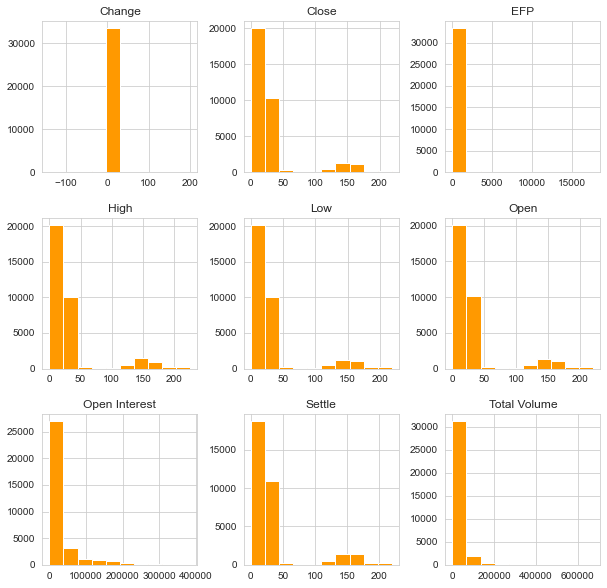

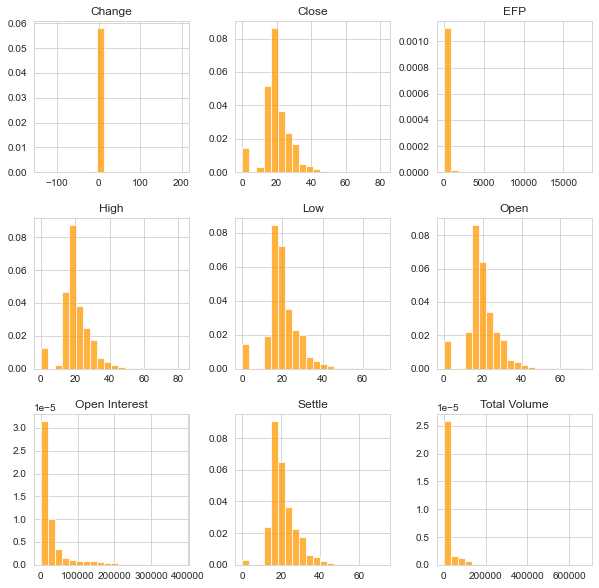

In [28]:
%run ./_projectNotebooks/lbbVIXAnalysis-2-1.ipynb

<a id="007"></a>
### lbbVIXAnalysis-2-2.ipynb
Determine the SPX Options date when given only the trade date. The SPX Options expire on the third Friday of the contract month. 

In [29]:
%run ./_projectNotebooks/lbbVIXAnalysis-2-2.ipynb

<a id="008"></a>
### lbbVIXAnalysis-3.ipynb
Knowing the SPX Option expiration, calculate the VX front month and expiration and last trade date.<br>
From the CBOE site:<br>

<div class="alert alert-block alert-success">
Final Settlement Date:<br>
The final settlement date for a contract with the "VX" ticker symbol is on the Wednesday that is 30 days prior to the third Friday of the calendar month immediately following the month in which the contract expires. 

If that Wednesday or the Friday that is 30 days following that Wednesday is a Cboe Options holiday, the final settlement date for the contract shall be on the business day immediately preceding that Wednesday. </div>

In [30]:
%run ./_projectNotebooks/lbbVIXAnalysis-3.ipynb

<a id="009"></a>
### lbbVIXAnalysis-4.ipynb
Run quality checks to ensure the term formula is correct. Consider removing sparse classes.(years)

In [31]:
%run ./_projectNotebooks/lbbVIXAnalysis-4.ipynb

C:\Users\cinderella\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


<a id="010"></a>
### lbbVIXAnalysis-5.ipynb<br>
Finalization of vxTerm column and frontMth column

In [32]:
%run ./_projectNotebooks/lbbVIXAnalysis-5.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33678 entries, 12542 to 2640
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Trade Date   33678 non-null  datetime64[ns] 
 1   diffDates    33678 non-null  timedelta64[ns]
 2   Futures      33678 non-null  object         
 3   futYear      33678 non-null  int64          
 4   futMth       33678 non-null  int64          
 5   calYear      33678 non-null  int64          
 6   LTD          33678 non-null  datetime64[ns] 
 7   t01XP        33678 non-null  datetime64[ns] 
 8   9MthsStart   33678 non-null  datetime64[ns] 
 9   7MthsStart   33678 non-null  datetime64[ns] 
 10  Open         33678 non-null  float64        
 11  High         33678 non-null  float64        
 12  Low          33678 non-null  float64        
 13  Close        33678 non-null  float64        
 14  Settle       33678 non-null  float64        
 15  numMthT01    33678 non-null  int6

<a id="011"></a>
### lbbVIXAnalysis-6-1.ipynb<br>
Trimming of dirty data, reduced df to essential features before multi-index pivot

In [33]:
%run ./_projectNotebooks/lbbVIXAnalysis-6-1.ipynb

<a id="012"></a>
### lbbVIXAnalysis-6-2.ipynb<br>
Deal with NaNs and flatten df

In [34]:
%run ./_projectNotebooks/lbbVIXAnalysis-6-2.ipynb

<a id="013"></a>
### lbbVIXAnalysis-6-3A.ipynb<br>
Animation of vxTerm slope throughout the years

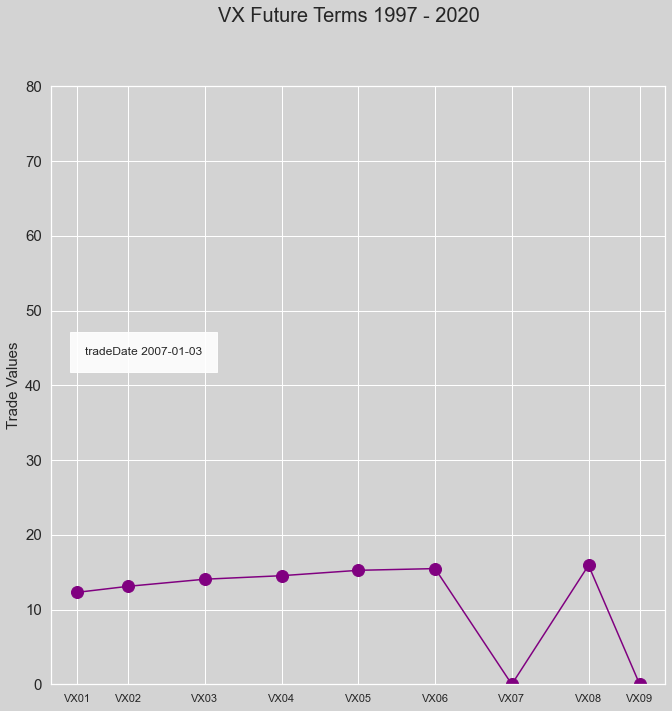

In [ ]:
%run ./_projectNotebooks/lbbVIXAnalysis-6-3A.ipynb

<a id="014"></a>
### lbbVIXAnalysis-1-1-2-Data-Initial-Other-Yahoo.ipynb<br>
Download data and after review, MOVE it to the folder labeled, Data-LATEST-NotVX

In [3]:
os.getcwd()

'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final'

In [4]:
%run ./_projectNotebooks/lbbVIXAnalysis-1-1-2-Data-Initial-Other-Yahoo.ipynb

<a id="015"></a>
### lbbVIXAnalysis-1-1-2-Data-Initial-Yield-Curve.ipynb<br>
This is similar except to get the data you need to open an excel workbook, paste the copied data from the web link, and save as a .csv file called <br>
'yieldCurve.csv

In [4]:
os.chdir('C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks')

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll <br>
Use the hyperlink above and copy paste data into notepad++<br>
Convert the tabs to commas and save as .csv file https://code2care.org/pages/replace-tabs-by-spaces-or-comma-notepad-plus-plus<br>

Once you are happy with the data save the csv to the Data-LATEST-NotVX folder


<a id="016"></a>
### lbbVIXAnalysis-7.ipynb<br>
Adds several new features to vxTerm values and combines Yahoo data (SPX, VIX, and FXI)and features.

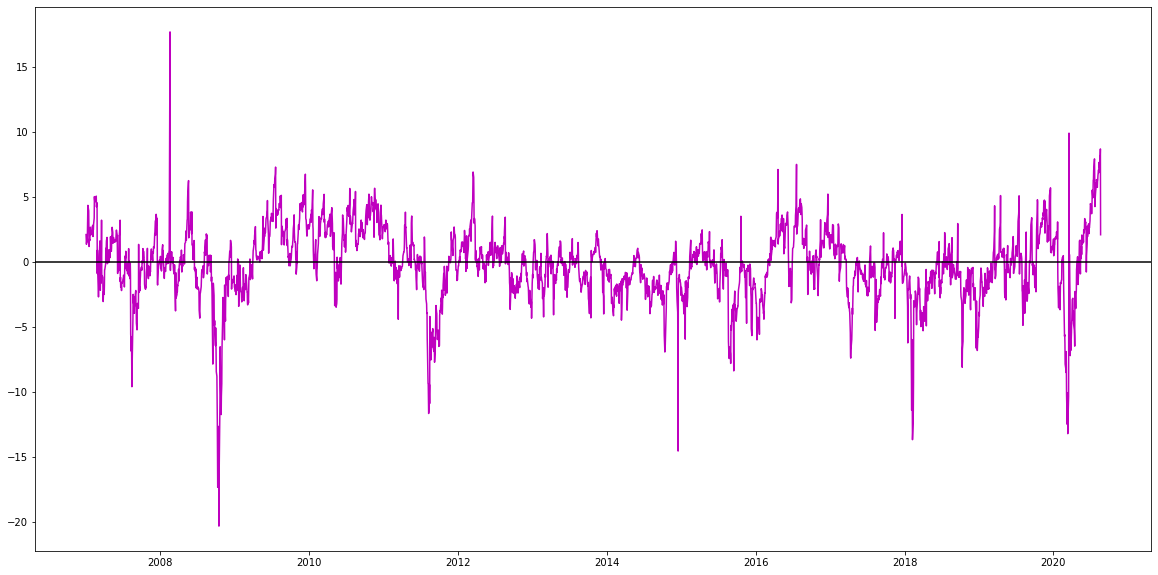

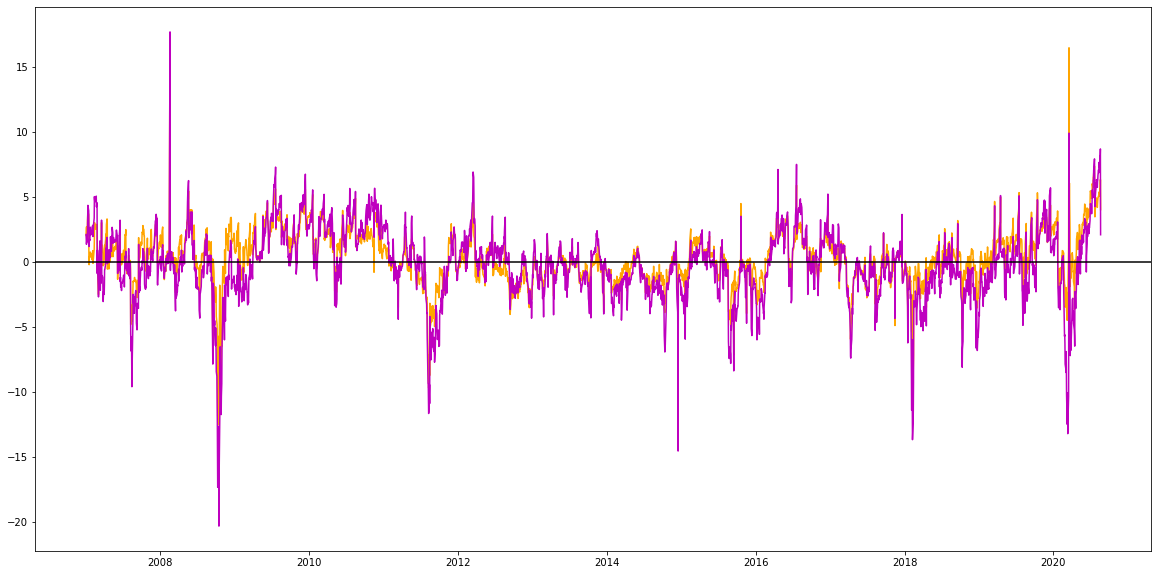

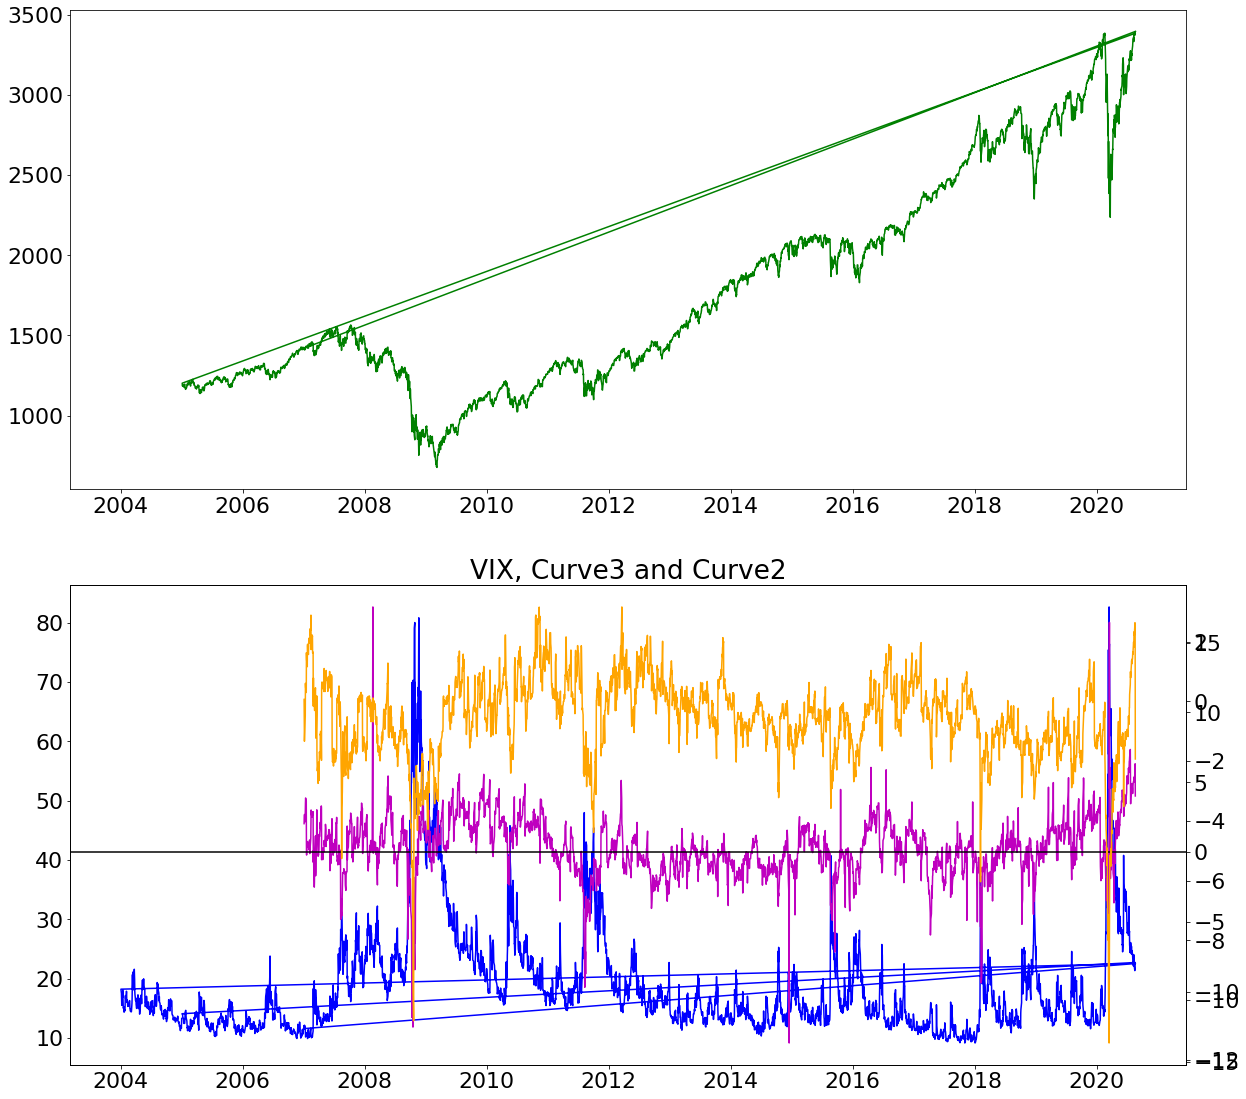

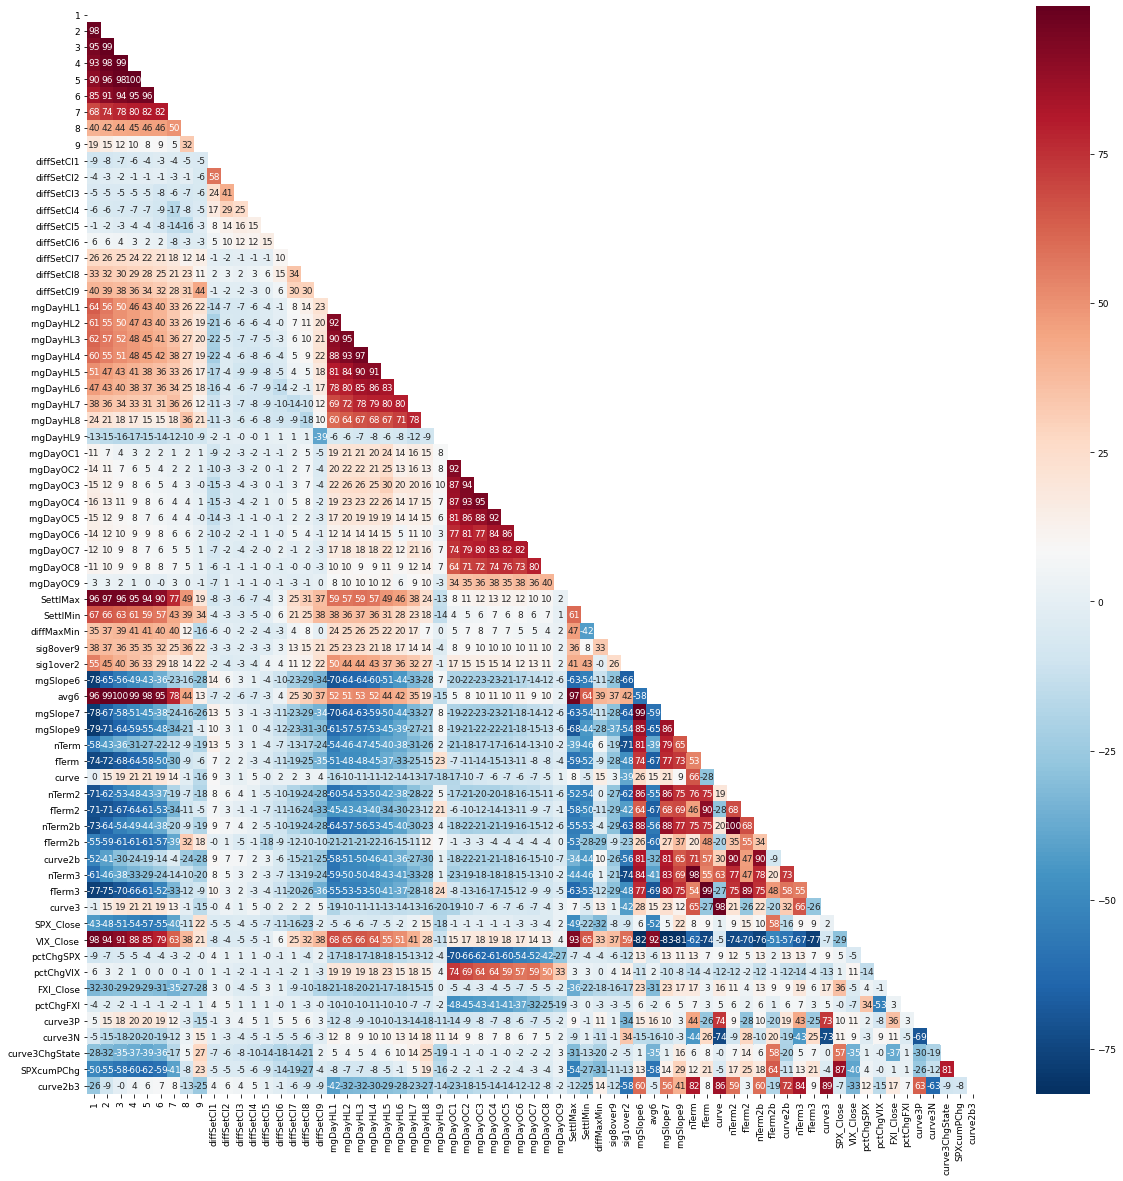

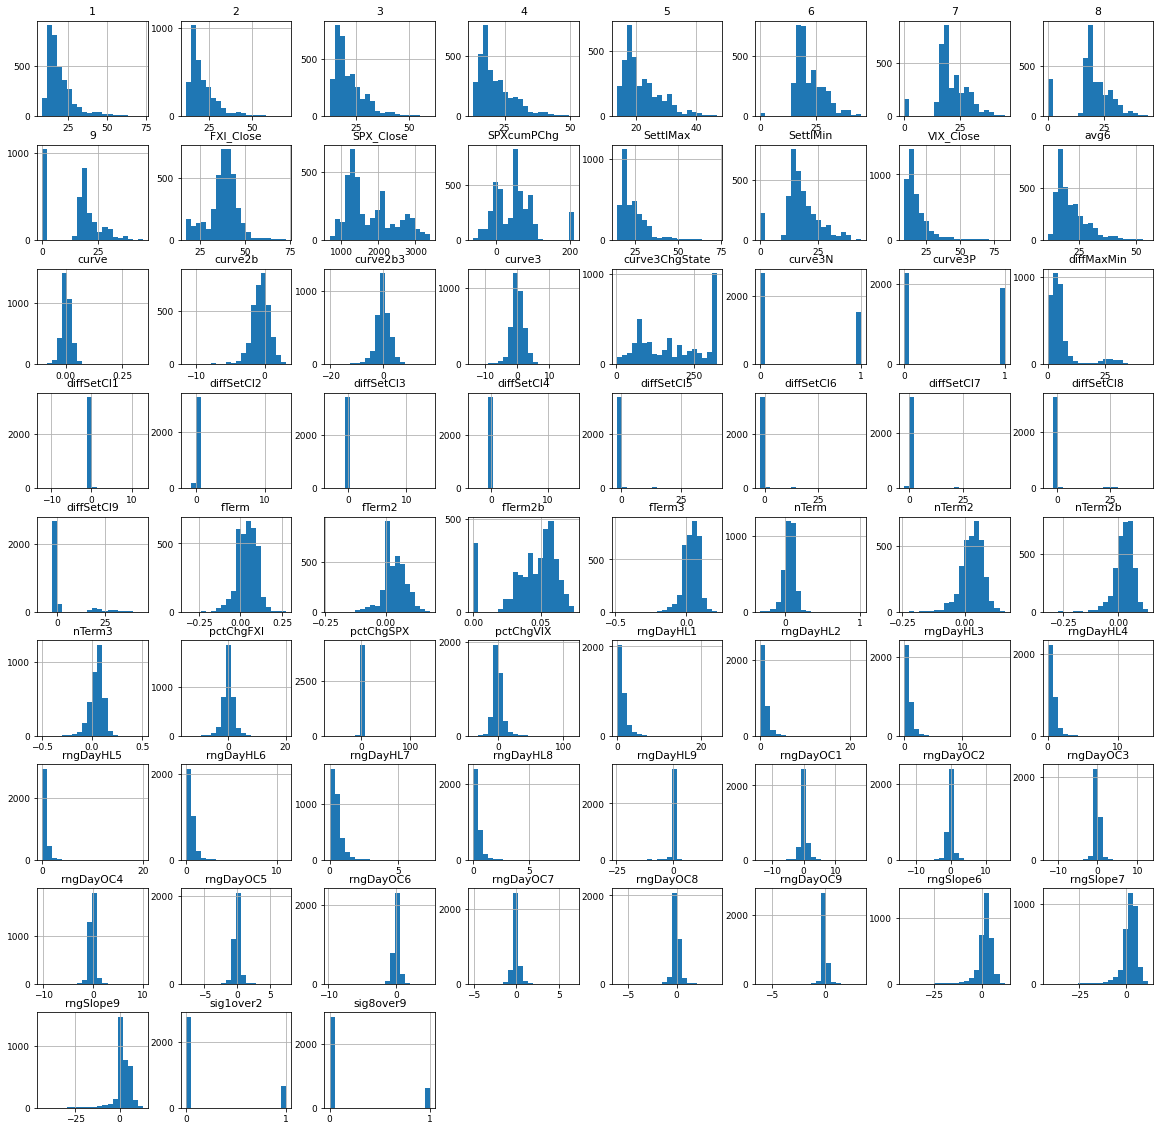

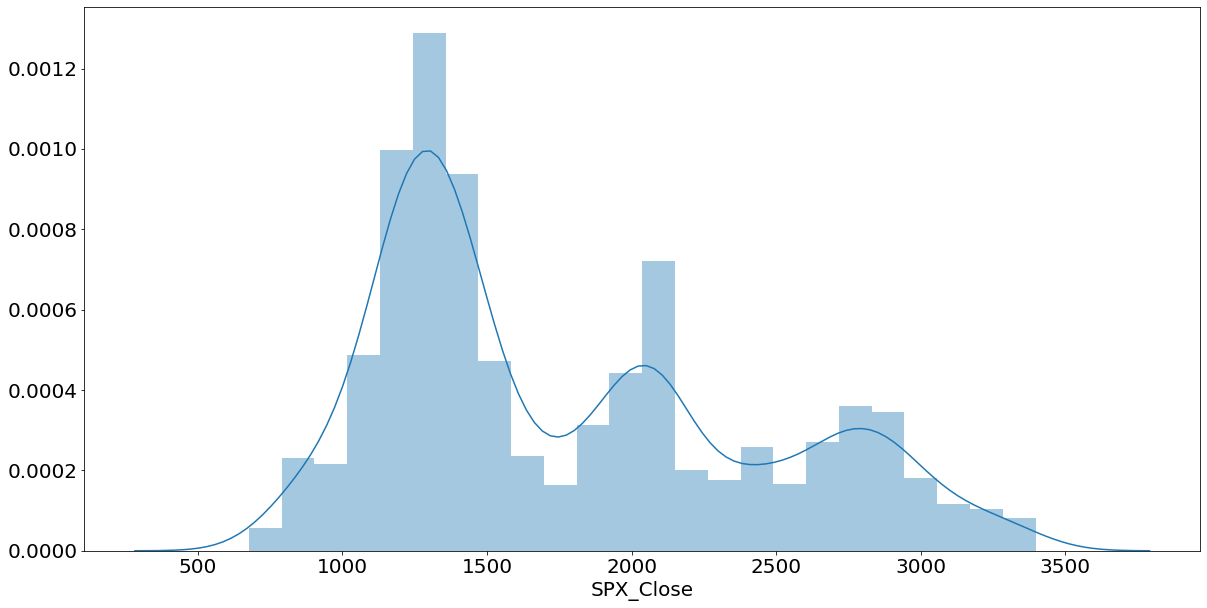

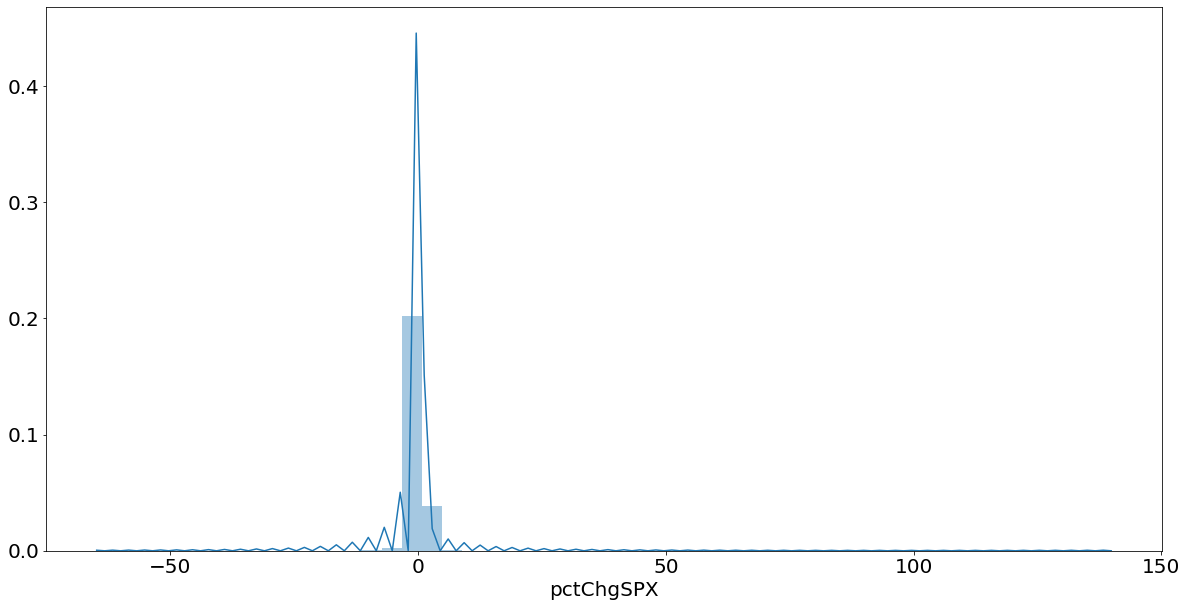

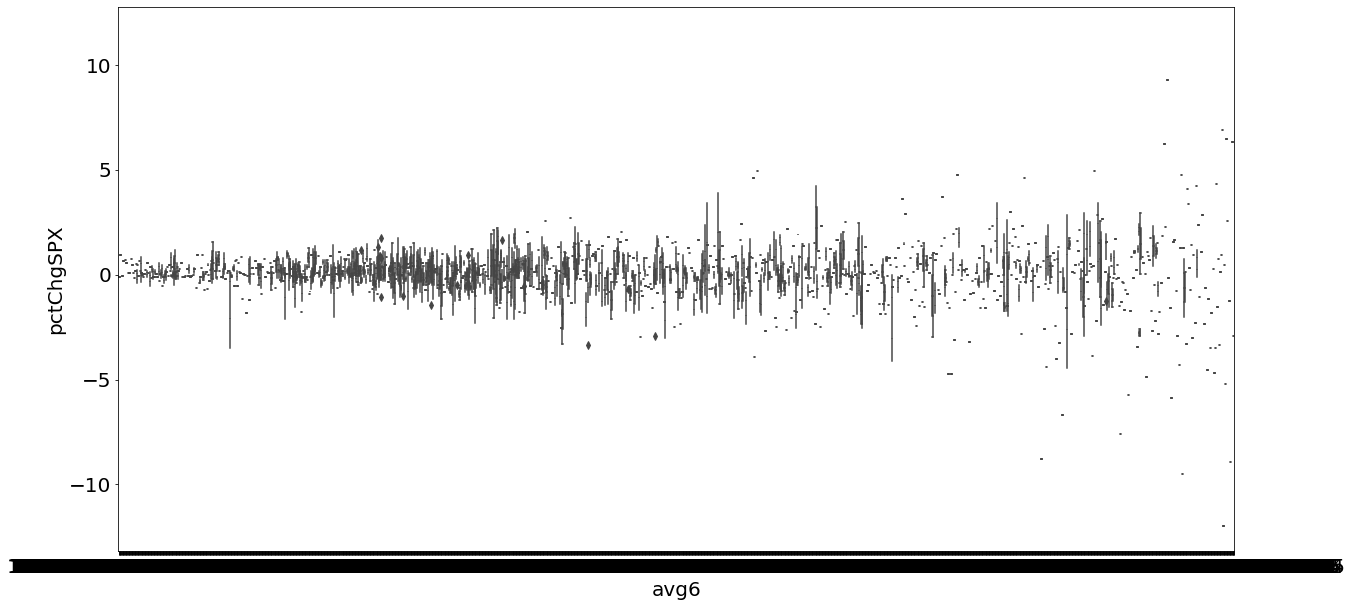

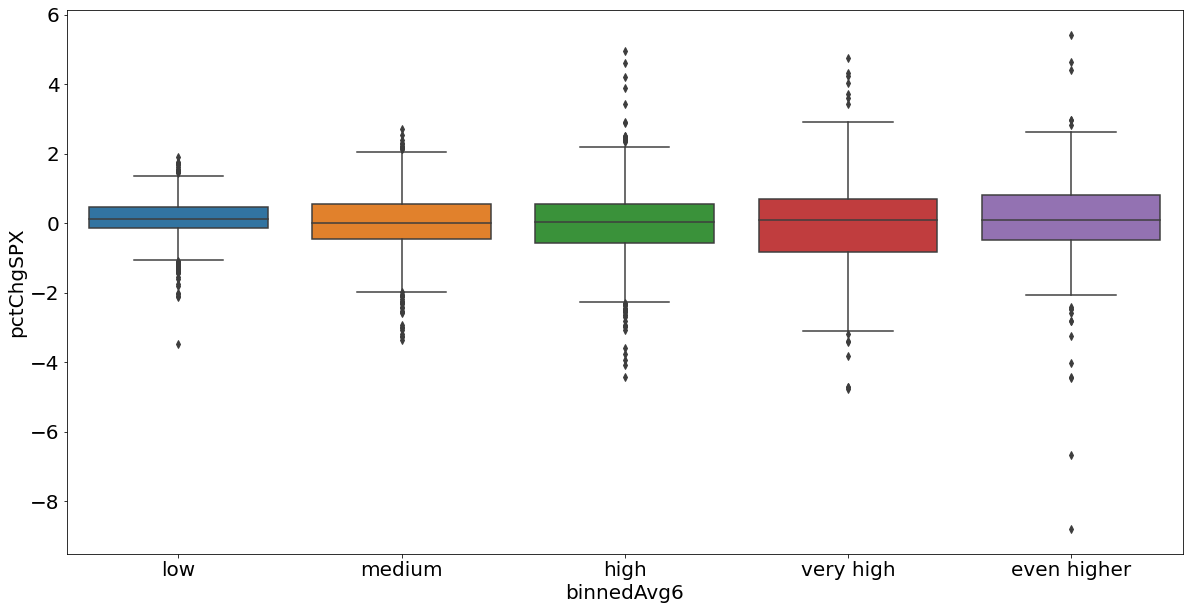

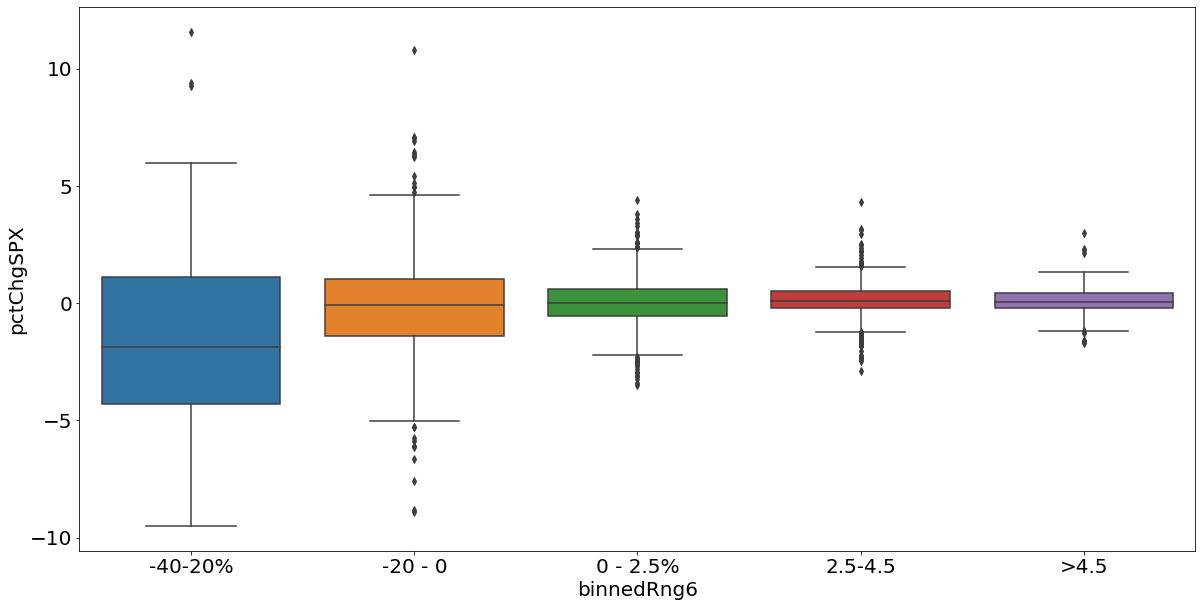

In [5]:
%run lbbVIXAnalysis-7.ipynb

In [7]:
os.chdir('C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks')

<a id="017"></a>
### lbbVIXAnalysis-8-0A.ipynb<br>
Animation of Yield Curve downloaded earlier.

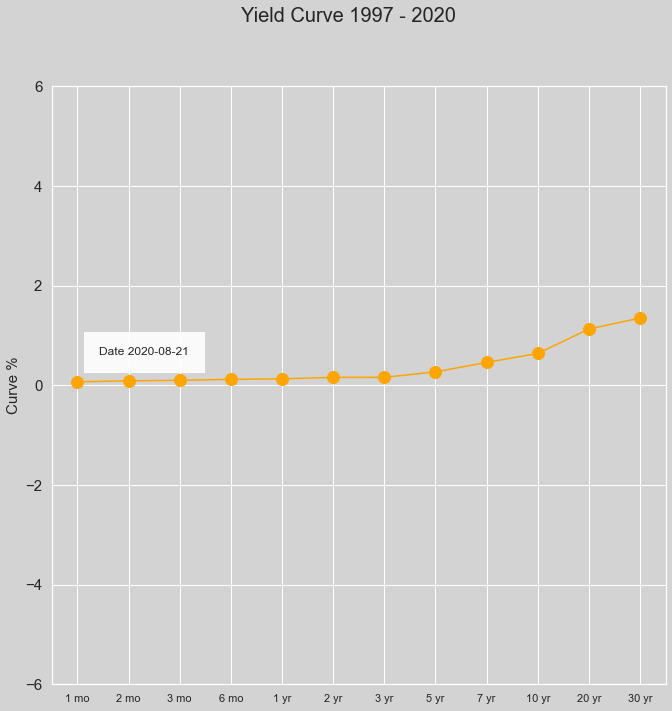

In [8]:
%run lbbVIXAnalysis-8-0A.ipynb

<a id="018"></a>
### lbbVIXAnalysis-8-1.ipynb<br>
Yield Curve features and cleaning.

In [9]:
%run ./_projectNotebooks/lbbVIXAnalysis-8-1.ipynb

<a id="019"></a>
### lbbVIXAnalysis-8-2.ipynb<br>
Yield Curve clustering using k-Means

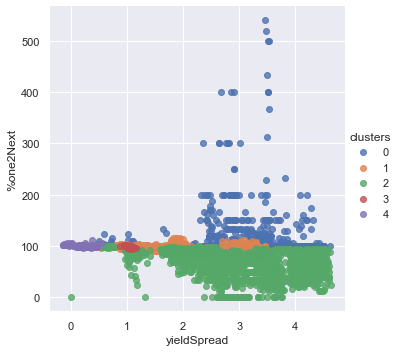

C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distribut

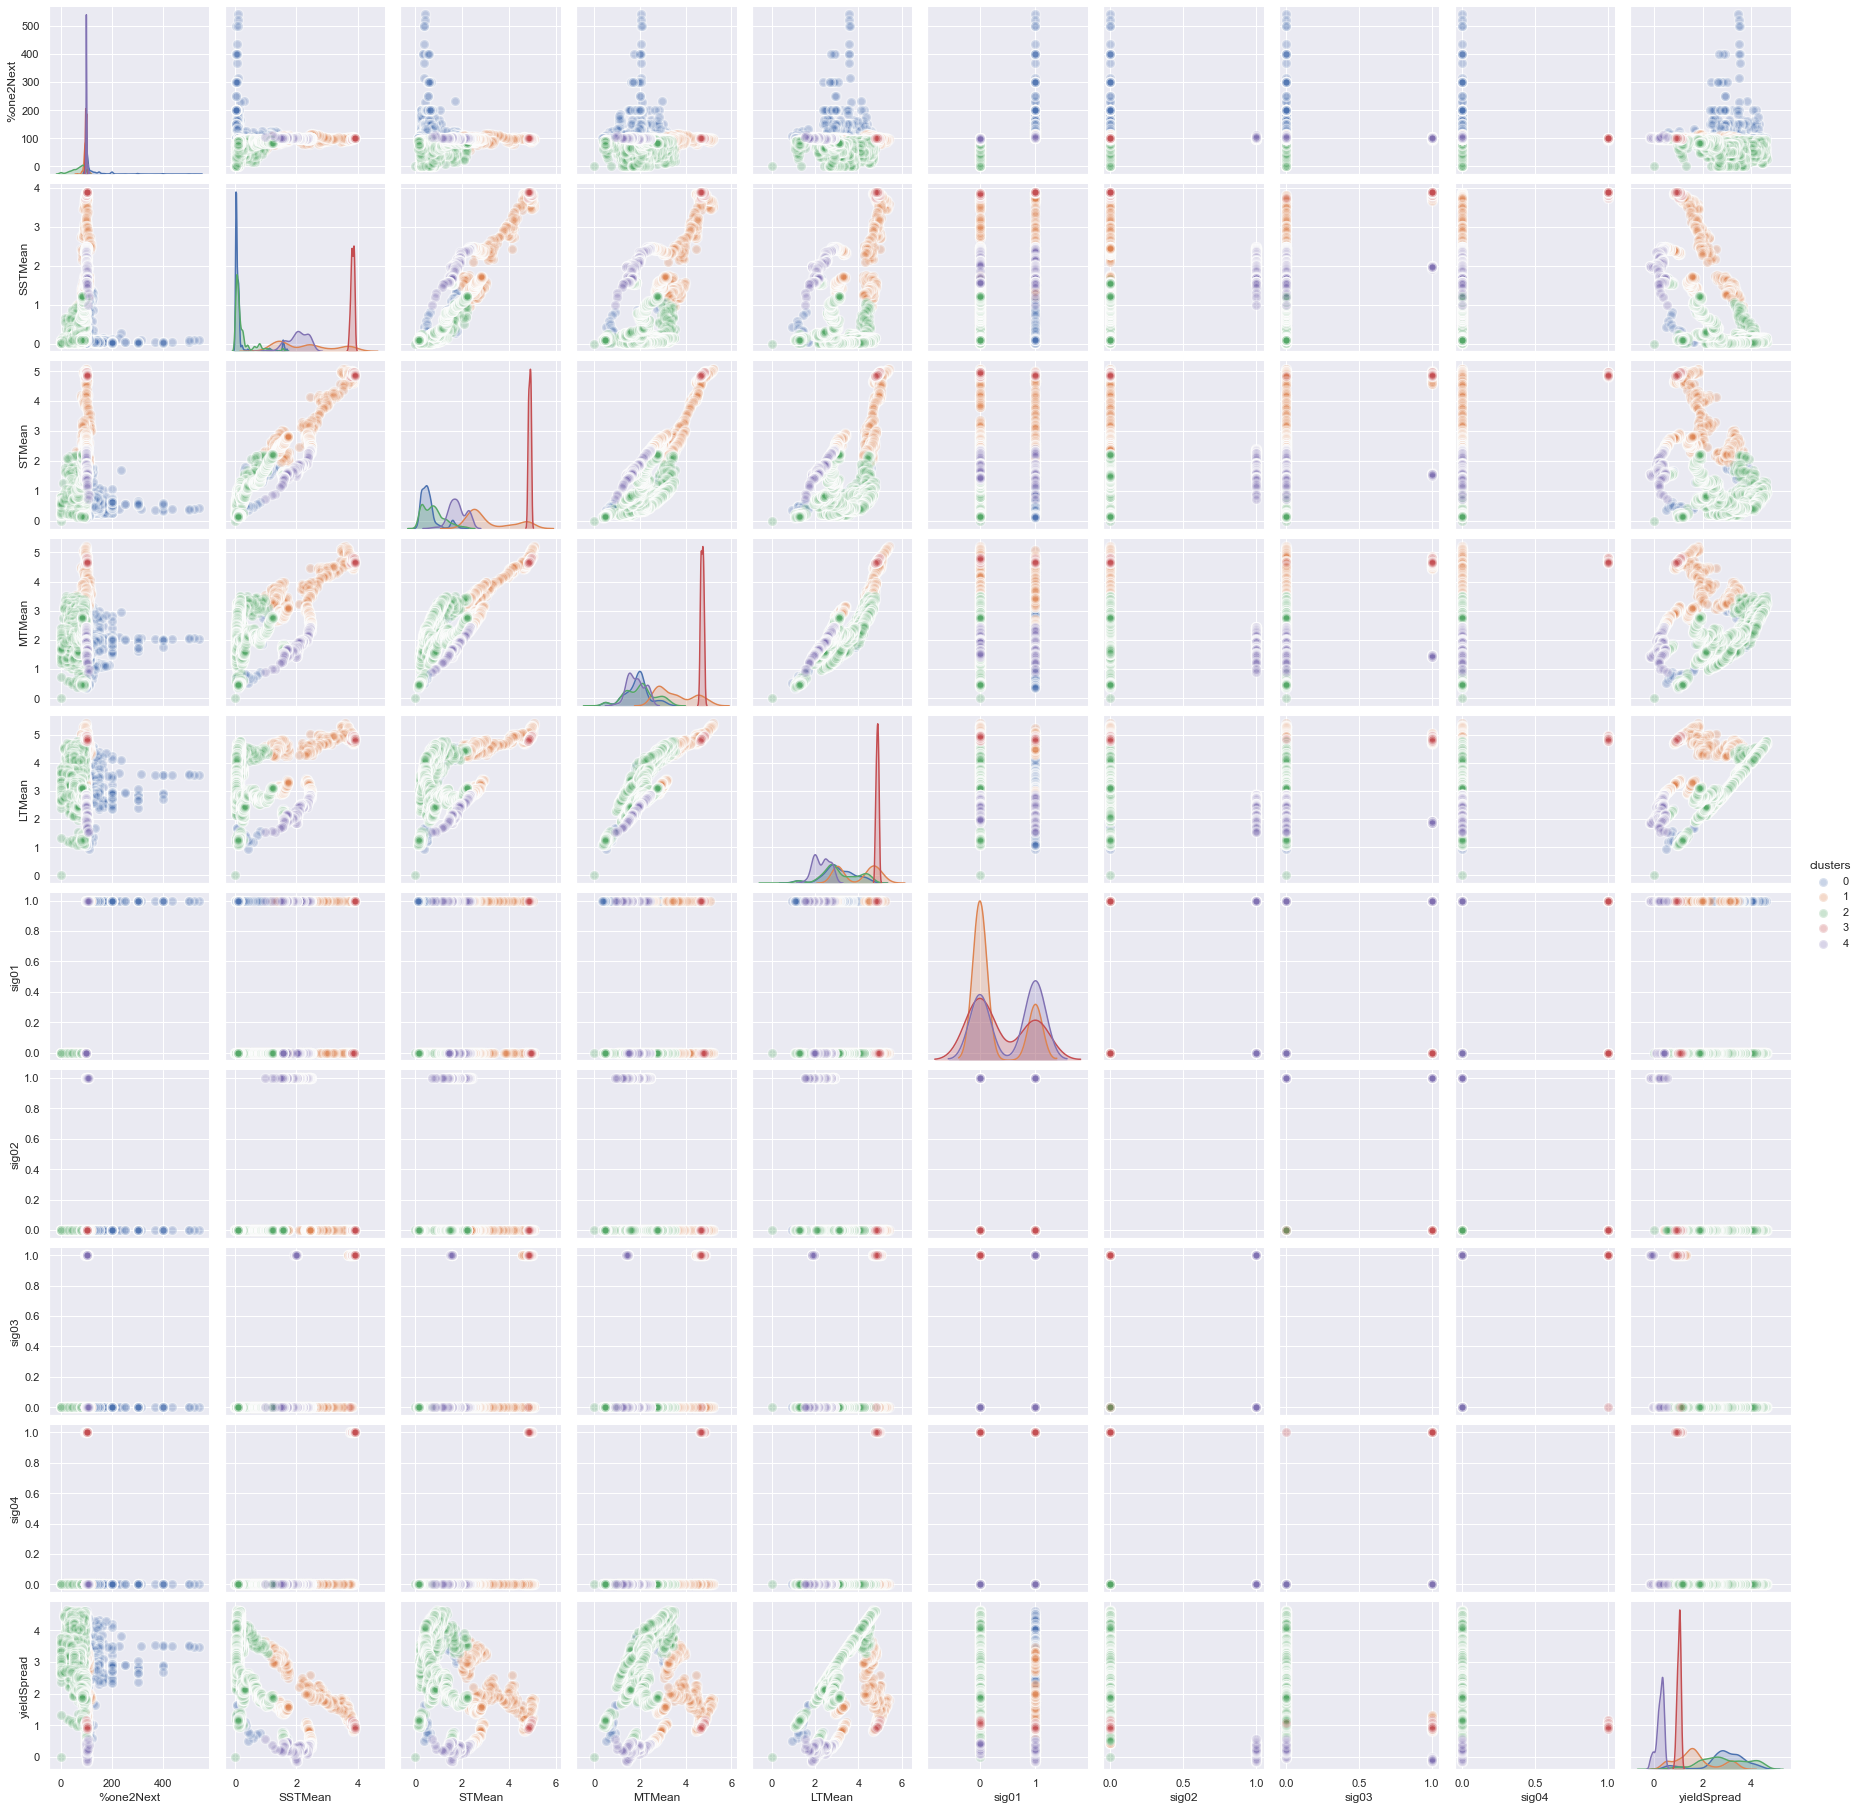

In [10]:
%run ./_projectNotebooks/lbbVIXAnalysis-8-2.ipynb

<a id="020"></a>
### lbbVIXAnalysis-9-1.ipynb<br>
Combined df that includes abbreviated Yield Curve data as well as vxTerm, SPX, FXI and VIX data. <br>


In [11]:
%run ./_projectNotebooks/lbbVIXAnalysis-9.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3433 entries, 0 to 3433
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1               3433 non-null   float64
 1   2               3433 non-null   float64
 2   3               3433 non-null   float64
 3   4               3433 non-null   float64
 4   5               3433 non-null   float64
 5   6               3433 non-null   float64
 6   7               3433 non-null   float64
 7   8               3433 non-null   float64
 8   9               3433 non-null   float64
 9   diffSetCl1      3433 non-null   float64
 10  diffSetCl2      3433 non-null   float64
 11  diffSetCl3      3433 non-null   float64
 12  diffSetCl4      3433 non-null   float64
 13  diffSetCl5      3433 non-null   float64
 14  diffSetCl6      3433 non-null   float64
 15  diffSetCl7      3433 non-null   float64
 16  diffSetCl8      3433 non-null   float64
 17  diffSetCl9      3433 non-null   f

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''